Q3
Fuel economy data are the result of vehicle testing done at the Environmental Protection
Agency's National Vehicle and Fuel Emissions Laboratory in Ann Arbor, Michigan, and by
vehicle manufacturers with oversight by EPA.
Datset Description:
 Model Vehicle make and model
 Displ Engine displacement - the size of an engine in liters
 Cyl The number of cylinders in a particular engine
 Trans Transmission Type and Number of Gears
 Drive Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)
 Fuel Fuel Type
 Cert Region* Certification Region Code
 Sales Area** Certification Region Code
 Stnd Vehicle emissions standard
 Stnd Description* Vehicle emissions standard description
 Underhood ID This is a 12-digit ID number that can be found on the
underhood emission label of every vehicle. It's required by the EPA to
designate its "test group" or "engine family."
 Veh Class EPA Vehicle Class
 Air Pollution Score Air pollution score (smog rating)
 City MPG Estimated city mpg (miles/gallon)
 Hwy MPG Estimated highway mpg (miles/gallon)

 Cmb MPG Estimated combined mpg (miles/gallon)
 Greenhouse Gas Score Greenhouse gas rating
 SmartWay Yes, No, or Elite
 Comb CO2* Combined city/highway CO2 tailpipe emissions in grams per mile
Note: For more details information about the dataset refer to the text file

Perform the pre-requisite viz. :
Assessing the Data

i. Data cleaning
ii. Inspection
iii. Manipulation if required
iv. Extracting meaningful visualization based on your understanding
v. Data consolidation if required

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
#read dataset
df_08 = pd.read_csv("all_alpha_08.csv")
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [187]:
# Find no of NAN value in each column
df_08.isna().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [188]:
# Get information of dataframe
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [189]:
for column in ['Cyl', 'Trans', 'Drive', 'FE Calc Appr', 'City MPG','Hwy MPG','Cmb MPG','Unadj Cmb MPG','Greenhouse Gas Score']:
    df_08[column].fillna(df_08[column].mode()[0], inplace=True)
df_08.isna().sum()

Model                   0
Displ                   0
Cyl                     0
Trans                   0
Drive                   0
Fuel                    0
Sales Area              0
Stnd                    0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
FE Calc Appr            0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Unadj Cmb MPG           0
Greenhouse Gas Score    0
SmartWay                0
dtype: int64

In [190]:
# Get description of dataframe
df_08.describe()

,Displ,Unadj Cmb MPG
count,2404.000000,2404.000000
mean,3.748918,23.083772
std,1.335785,6.697111
min,1.300000,10.018400
25%,2.500000,18.089450
50%,3.500000,23.144300
75%,4.800000,27.514300
max,8.400000,65.777800


<Axes: >

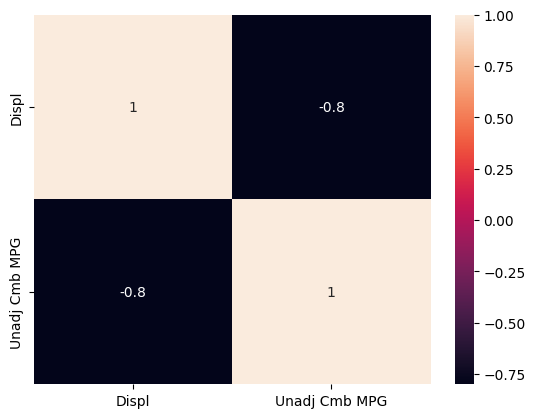

In [199]:
corr = df_08.select_dtypes(exclude=object).corr()
sns.heatmap(corr,annot=True)

In [207]:
#import cleaned datasets
df1 = pd.read_csv("clean_08.csv")
df2 = pd.read_csv("clean_18.csv")
df1.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [208]:
df2.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


Q1. Find out the alternative sources of fuel available in 2008 & 2018 respectively and by how much?


Fuel sources available in 2008:  ['CNG' 'ethanol' 'gas']
Fuel sources available in 2018:  ['Diesel' 'Ethanol' 'Electricity' 'Gas']
vehicles with alternate fuels in 2008 -  0.303951367781155 %
vehicles with alternate fuels in 2018 -  9.975961538461538 %


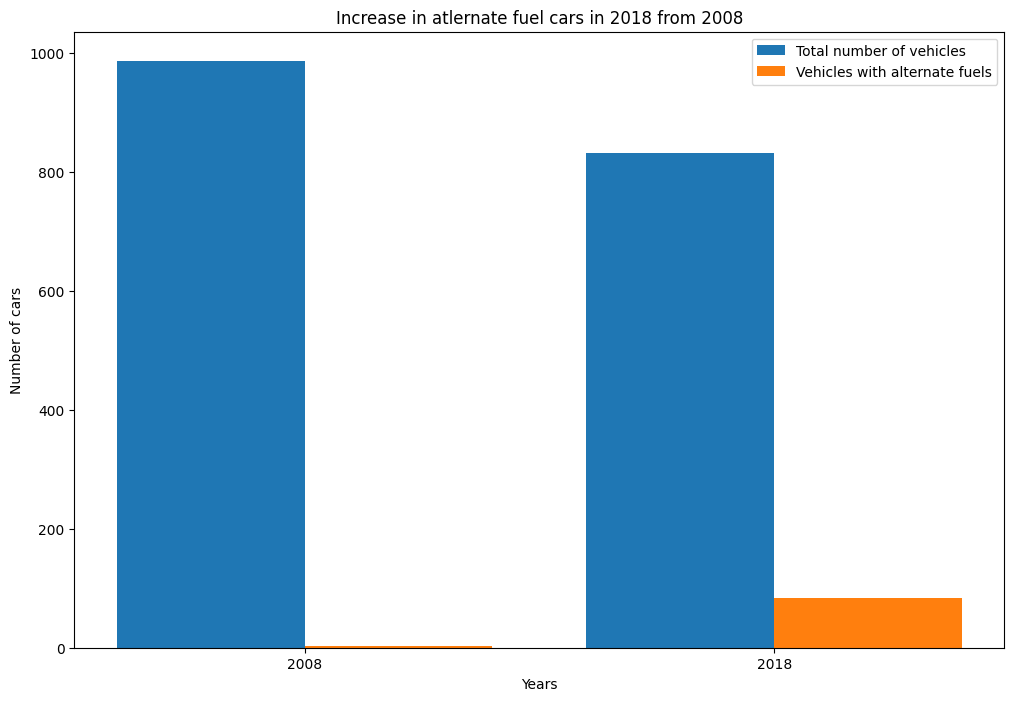

In [209]:
#filter data to find vehicles with only alternate fuels
df_08_alt = df1[~(df1["fuel"]=='Gasoline')]
df_18_alt = df2[~(df2["fuel"]=='Gasoline')]

#print names of alternate fuels
print("Fuel sources available in 2008: ", df_08_alt["fuel"].unique())
print("Fuel sources available in 2018: ", df_18_alt["fuel"].unique())

#Find total number of data and vehicles with alternate fuels in 2008
total_veh_08 = len(df1)
alt_fuel_veh_08 = len(df_08_alt)

#Find total number of data and vehicles with alternate fuels in 2008
total_veh_18 = len(df2)
alt_fuel_veh_18 = len(df_18_alt)

#% of vehicles with alternate fuels in 2008
print("vehicles with alternate fuels in 2008 - ",100*alt_fuel_veh_08/total_veh_08,"%")

#% of vehicles with alternate fuels in 2018
print("vehicles with alternate fuels in 2018 - ",100*alt_fuel_veh_18/total_veh_18,"%")

#plot bar plot total nuymber of vehicles and vehicles with alternate fuel
plt.figure(figsize=(12,8))
plt.bar(x=[1,3],height=[total_veh_08,total_veh_18],label='Total number of vehicles',width=0.8)
plt.bar(x=[1.8,3.8],height=[alt_fuel_veh_08,alt_fuel_veh_18],label='Vehicles with alternate fuels',width=0.8)
plt.legend()
plt.xticks([1.4,3.4],[2008,2018])
plt.xlabel("Years")
plt.ylabel("Number of cars")
plt.title("Increase in atlernate fuel cars in 2018 from 2008");
plt.show()

Q2. Is there any improvement in ‘fuel economy’ with respect to vehicle class from 2008 to 2018,
perform the necessary steps to examine?


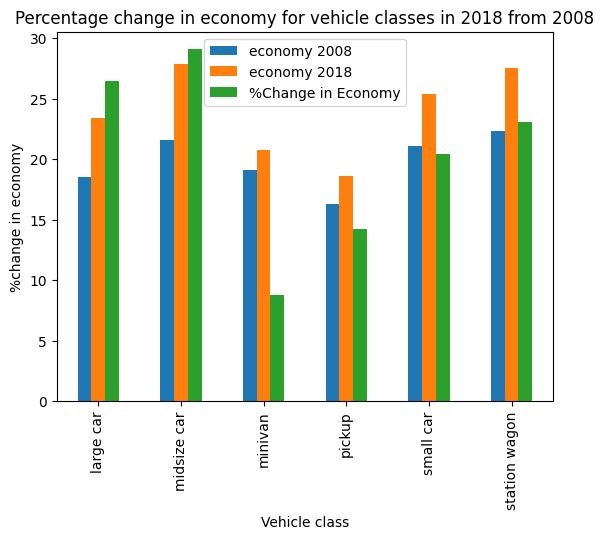

In [210]:
# Grouped the dataset according to vehicle class
df1_group_vehclass = df1.groupby("veh_class")
df2_group_vehclass = df2.groupby("veh_class")

# Using mean on fuel economy of dataset grouped by vehicle class
econmy_08 = pd.Series(df1_group_vehclass["cmb_mpg"].mean())
econmy_18 = pd.Series(df2_group_vehclass["cmb_mpg"].mean())

#create dataset with economies for class vehilcles in 2008 and 2018 both
df_economy = pd.concat([econmy_08,econmy_18],axis=1,join = "inner")
df_economy = df_economy.set_axis(['economy 2008', 'economy 2018'], axis=1)

# Add column to calculate change in economy
df_economy["%Change in Economy"]= 100*(df_economy.iloc[:,1]-df_economy.iloc[:,0])/df_economy.iloc[:,0]

#plot change in economy
df_economy.plot(kind='bar')
plt.xlabel("Vehicle class")
plt.ylabel("%change in economy")
plt.title("Percentage change in economy for vehicle classes in 2018 from 2008");
plt.show()

Q3. Is there any change in characteristics of SmartWay Vehicles ?


In [211]:
# Get all vehicles with smartway not equal to no
df_smartway_08 = df1[df1["smartway"]!="no"]
df_smartway_18 = df2[df2["smartway"]!="No"]

#calculate difference between drescription between 2008 and 2018
df_change_smartway = df_smartway_08.describe()-df_smartway_18.describe()
df_change_smartway

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,0.814932,0.891131,2.152827,-13.923197,-13.059064,-13.624269,-1.057505
std,0.215405,0.585696,-0.650304,-12.989310,-10.020042,-11.788050,-0.370040
min,0.100000,1.000000,3.000000,-8.000000,-5.000000,-6.000000,-1.000000
25%,0.775000,0.000000,4.000000,-9.000000,-10.000000,-9.000000,-1.000000
50%,0.700000,0.000000,1.500000,-8.500000,-9.000000,-9.000000,0.000000
75%,1.000000,2.000000,0.000000,-9.250000,-10.250000,-10.000000,-2.000000
max,1.500000,2.000000,2.500000,-65.000000,-54.000000,-60.000000,0.000000


Q4. Which all features are associated with better fuel economy?


                         displ       cyl  air_pollution_score  city_mpg  \
displ                 1.000000  0.899304            -0.289993 -0.790440   
cyl                   0.899304  1.000000            -0.270417 -0.756304   
air_pollution_score  -0.289993 -0.270417             1.000000  0.432434   
city_mpg             -0.790440 -0.756304             0.432434  1.000000   
hwy_mpg              -0.801678 -0.733064             0.400708  0.902942   
cmb_mpg              -0.818799 -0.770538             0.425784  0.980891   
greenhouse_gas_score -0.847613 -0.820940             0.388444  0.910693   

                       hwy_mpg   cmb_mpg  greenhouse_gas_score  
displ                -0.801678 -0.818799             -0.847613  
cyl                  -0.733064 -0.770538             -0.820940  
air_pollution_score   0.400708  0.425784              0.388444  
city_mpg              0.902942  0.980891              0.910693  
hwy_mpg               1.000000  0.960533              0.931744  
cmb_mpg  

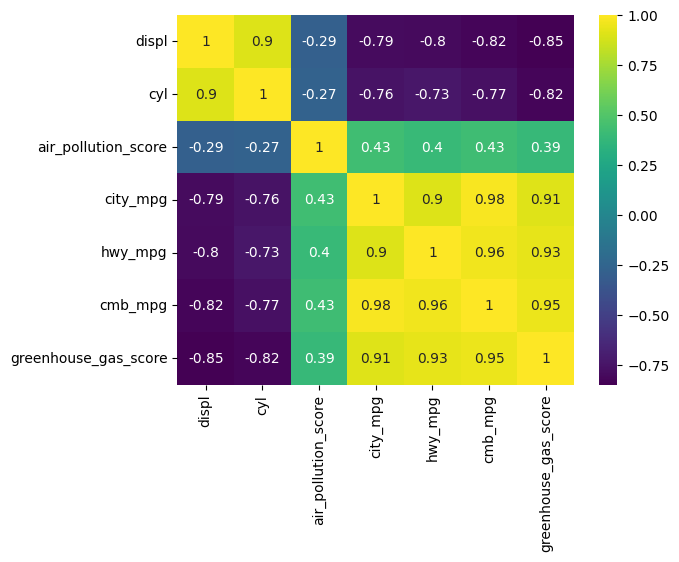

                         displ       cyl  air_pollution_score  city_mpg  \
displ                 1.000000  0.928189            -0.384986 -0.536748   
cyl                   0.928189  1.000000            -0.404966 -0.524090   
air_pollution_score  -0.384986 -0.404966             1.000000  0.288700   
city_mpg             -0.536748 -0.524090             0.288700  1.000000   
hwy_mpg              -0.605202 -0.589986             0.309338  0.950309   
cmb_mpg              -0.574880 -0.561166             0.301150  0.992635   
greenhouse_gas_score -0.754193 -0.743946             0.390771  0.785513   

                       hwy_mpg   cmb_mpg  greenhouse_gas_score  
displ                -0.605202 -0.574880             -0.754193  
cyl                  -0.589986 -0.561166             -0.743946  
air_pollution_score   0.309338  0.301150              0.390771  
city_mpg              0.950309  0.992635              0.785513  
hwy_mpg               1.000000  0.978206              0.826981  
cmb_mpg  

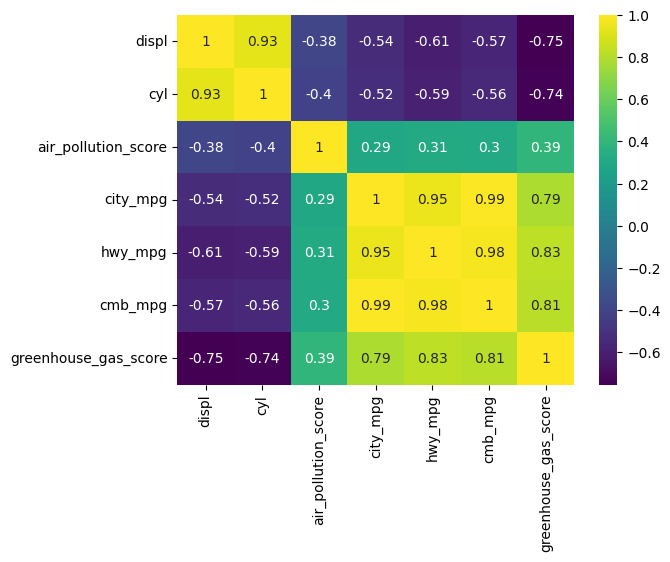

In [212]:
#correlation for 2008
corr1 = pd.DataFrame(df1.select_dtypes(exclude=object).corr())
print(corr1)
#Heatmap of correlation for 2008
sns.heatmap(corr1,cmap='viridis',annot = True)
plt.show()

#correlation for 2018
corr2 = pd.DataFrame(df2.select_dtypes(exclude=object).corr())
print(corr2)
#Heatmap of correlation for 2008
sns.heatmap(corr2,cmap='viridis',annot = True)
plt.show()

from correlation tables for 2008 and 2018, city_mpg,hwy_mpg,displ,cyl,greenhouse_gas_score are observed to be associated with better fuel economy.

Q5. How much improvement is there in miles/gallon or mpg? Also, which vehicle has improved the
most?

In [226]:
#Creat dataframe with models with economy in 2008 and 2018
s1 = df1[["model","cmb_mpg"]]
s1.set_index("model",inplace= True)
s1= s1.groupby("model").mean()
s2 = df2[["model","cmb_mpg"]]
s2.set_index("model",inplace= True)
s2= s2.groupby("model").mean()
data_economy = pd.merge(s1,s2,how='inner',on="model")

#Create a column with change in economy 
data_economy["Improvement"] = data_economy["cmb_mpg_y"]-data_economy["cmb_mpg_x"]
print(data_economy)

# Print the vehicle with max change in economy
print("Vehicle with most improvement in mpg - " ,data_economy["Improvement"].idxmax()," which has Economy change - " ,data_economy["Improvement"].max())

                   cmb_mpg_x  cmb_mpg_y  Improvement
model                                               
ACURA RDX          19.000000  22.500000     3.500000
AUDI A3            23.333333  28.000000     4.666667
AUDI A4            21.000000  27.000000     6.000000
AUDI A6            19.666667  25.666667     6.000000
AUDI A8 L          16.500000  22.000000     5.500000
...                      ...        ...          ...
TOYOTA Yaris       31.500000  32.500000     1.000000
VOLKSWAGEN Jetta   24.166667  30.000000     5.833333
VOLKSWAGEN Passat  21.250000  29.000000     7.750000
VOLVO S60          21.333333  27.000000     5.666667
VOLVO XC 90        15.666667  32.200000    16.533333

[72 rows x 3 columns]
Vehicle with most improvement in mpg -  VOLVO XC 90  which has Economy change -  16.53333333333334
